In [5]:
import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as _img
import os
from PIL import Image, ImageDraw, ImageFont


In [2]:
pip install timm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

KeyboardInterrupt: 

In [6]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in C:\Users\user/.cache\torch\hub\intel-isl_MiDaS_master


In [7]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
print(device)

cuda


In [8]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in C:\Users\user/.cache\torch\hub\intel-isl_MiDaS_master


In [7]:
# ##### NO resize
# file_path = 'test.jpg'
# img = cv2.imread(file_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

# input_batch = transform(img).to(device)

In [9]:
##### resize
file_path = 'test.jpg'
img = cv2.imread(file_path)
h, w = img.shape[0], img.shape[1]
# print(h, w)
img = cv2.resize(img, (int(w/10), int(h/10)), interpolation=cv2.INTER_AREA)
print(img.shape)
cv2.imshow('output', img)
# h, w = img.shape[0], img.shape[1]
# img = cv2.resize(img, (h*0.2, w*0.2))
cv2.waitKey(0)
cv2.destroyAllWindows()

input_batch = transform(img).to(device)

(518, 345, 3)


In [10]:
with torch.no_grad():
    prediction = midas(input_batch)
    print(prediction)
    

    prediction_filter = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()


output = prediction_filter.cpu().numpy()


c:\Users\user\anaconda3\lib\site-packages\torch\nn\functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


tensor([[[22.5690, 22.5658, 22.4989,  ..., 21.7650, 21.8690, 21.8646],
         [22.6234, 22.5877, 22.5526,  ..., 21.9284, 21.9189, 21.9747],
         [22.5934, 22.6487, 22.5209,  ..., 22.0106, 21.9980, 21.9324],
         ...,
         [26.1997, 26.2731, 26.1940,  ..., 30.3177, 30.4601, 30.5183],
         [26.3701, 26.3472, 26.3302,  ..., 30.4243, 30.4881, 30.5821],
         [26.4354, 26.3747, 26.3199,  ..., 30.3702, 30.4905, 30.5348]]],
       device='cuda:0')


In [20]:
output.shape

(518, 345)

In [18]:
cv2_output = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)

cv2.imshow('output', cv2_output)
cv2.waitKey(0)
cv2.destroyAllWindows()


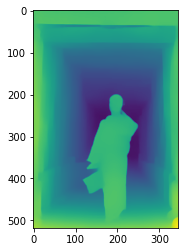

: 

In [ ]:
output_tmp = output + min(map(min, output))
plt.imshow(output_tmp)

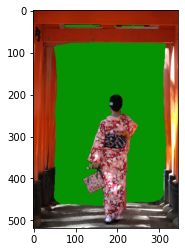

: 

In [ ]:
depth = 15
img_tmp = img.copy()
x_offset = 185
y_offset = 85
# indices = np.where(output[x_offset :x_offset+logo_img.shape[0], y_offset: y_offset+logo_img.shape[1]] > 16) #比logo淺的index
indices = np.where(output < depth)
img_tmp[indices] = (3, 147, 5)
img_tmp = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2RGB)
plt.imshow(img_tmp)

In [ ]:
img_tmp = img.copy()
indices = np.where(output < 10)
img_tmp[indices] = (3, 147, 5)
# img_tmp = cv2.cvtColor(img_tmp, cv2.COLOR_RGBA2BGR)
# h, w = img_tmp.shape[0], img_tmp.shape[1]
# img_tmp = cv2.resize(img_tmp, (int(w/10), int(h/10)), interpolation=cv2.INTER_AREA)
cv2.imshow('output', img_tmp)
cv2.waitKey(0)
cv2.destroyAllWindows()

: 

液體流出特效

In [ ]:
# img_tmp = img.copy()
depth = 0
while True:
    img_tmp = img.copy()
    indices = np.where(output < depth)
    img_tmp[indices] = (3, 147, 5)
    depth += 0.03
    
    cv2.imshow('output', img_tmp)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

: 

In [ ]:
# img_tmp = img.copy()
depth = 0
while True:
    img_tmp = img.copy()
    indices = np.where(output < depth)
    img_tmp_get_covered = img_tmp[indices]
    # print(100*depth)
    # cv2.circle(img_tmp, (140, 170), int(depth*100), (255, 0, 0), -1)
    # depth += 0.03
    # img_tmp[indices] = img_tmp_get_covered

    # img_tmp = cv2.cvtColor(img_tmp, cv2.COLOR_RGBA2BGR)
    # h, w = img_tmp.shape[0], img_tmp.shape[1]
    # img_tmp = cv2.resize(img_tmp, (int(w/10), int(h/10)), interpolation=cv2.INTER_AREA)
    
    cv2.imshow('output', img_tmp)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

: 

貼照片被深度蓋住

In [ ]:
frontimage_path = '2021logo.png'
frontimg = cv2.imread(frontimage_path, cv2.IMREAD_UNCHANGED)
h, w = frontimg.shape[0], frontimg.shape[1]
frontimg = cv2.resize(frontimg, (int(w/10), int(h/10)), interpolation=cv2.INTER_AREA)
print(frontimg.shape)
# frontimg = cv2.cvtColor(frontimg, cv2.COLOR_BGR2BGRA)
cv2.imshow('output', frontimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

(141, 189, 4)


: 

In [ ]:
# img_tmp = img.copy()
depth = 10
# x_offset = 0
# y_offset = 0
while True:
    img_tmp = img.copy()
    x_offset = 50
    y_offset = 100
    mask = img_tmp[x_offset:x_offset + frontimg.shape[0], y_offset:y_offset + frontimg.shape[1]].copy()

    indices = np.where(output > depth)
    # print(indices)
    # print(frontimg)

    mask[frontimg[:, :, 3] > 0] = frontimg[frontimg[:, :, 3] > 0][:, 0:3]
    
    
    img_tmp[x_offset:x_offset + frontimg.shape[0], y_offset:y_offset + frontimg.shape[1]] = mask
    img_tmp[indices] = img[indices]

    # indices = np.where(output < depth)
    # img_tmp[indices] = (3, 147, 5)
    # depth += 0.03
    
    cv2.imshow('output', img_tmp)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

: 

In [ ]:
# img_tmp = img.copy()
h, w = img.shape[0], img.shape[1]
edge_x = frontimg.shape[0] - h 
edge_y = frontimg.shape[1] - w

depth = 15
x_offset = 0
y_offset = 0
x_offset_add = 1
y_offset_add = 1
while True:
    img_tmp = img.copy()

    mask = img_tmp[x_offset:x_offset + frontimg.shape[0], y_offset:y_offset + frontimg.shape[1]].copy()

    indices = np.where(output > depth)
    # print(indices)
    # print(frontimg)

    mask[frontimg[:, :, 3] > 0] = frontimg[frontimg[:, :, 3] > 0][:, 0:3]
    
    
    img_tmp[x_offset:x_offset + frontimg.shape[0], y_offset:y_offset + frontimg.shape[1]] = mask
    img_tmp[indices] = img[indices]

    if x_offset + frontimg.shape[0] >= h:
        x_offset_add = -1
    elif x_offset <= 0:
        x_offset_add = 1
    if y_offset + frontimg.shape[1] >= w:
        y_offset_add = -1
    elif y_offset <= 0:
        y_offset_add = 1

    x_offset += x_offset_add
    y_offset += y_offset_add

    cv2.imshow('output', img_tmp)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

: 

: 